In [ ]:
pip install split-folders

In [ ]:
from tensorflow import keras
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import Dense,Dropout, GlobalAveragePooling2D,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import json
from keras import regularizers
from google.colab import files
import h5py
import pickle
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
%matplotlib inline
import pandas as pd
import cv2
import os
import shutil
#import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buat folder class

In [ ]:
url = '/content/drive/MyDrive/HOYA/BUNGA/'
dirlist = os.listdir(url)
for dir in dirlist : #ada

  try :
      os.makedirs('/content/drive/MyDrive/HOYA/DATA/'+dir, exist_ok = True)
  except OSError as error:
    print("Directory '%s' can not be created" %dir)

FileNotFoundError: ignored

**RESIZE CITRA**

In [ ]:
root = '/content/drive/MyDrive/HOYA/BUNGA/'
root_save = '/content/drive/MyDrive/HOYA/DATA/'
os.path.isdir(root_save)
list_dir = os.listdir(root) # your directory path
for dir in list_dir : #ada
  #print(root_save+dir)
  if os.path.isdir(root_save+dir)== 0:
    try :
      os.makedirs(root_save+dir, exist_ok = True)
    except OSError as error:
      print("Directory '%s' can not be created" %dir)
    list_file = os.listdir(root + dir + '/') # your directory path
    print(list_file)
    for file_name in list_file:
      url = root + dir + os.sep + file_name
      print(url)
      img = cv2.imread(url, cv2.IMREAD_UNCHANGED)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      print('Original Dimensions : ',img.shape)

      scale_percentx = 150/img.shape[0]
      scale_percenty = 150/img.shape[1] # percent of original size
      width = round(RGB_img.shape[0] * scale_percentx)
      height = round(RGB_img.shape[1] * scale_percenty)
      dim = (width, height)

      # resize image
      resized = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
      url_save = root_save + dir + os.sep + file_name
      #print('url_save',url_save)
      cv2.imwrite(url_save, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
      print('resize Dimensions : ',resized.shape)


/content/drive/MyDrive/HOYA/DATA/scortechinii
['1.JPG', '2.JPG', '3.JPG', '4.JPG', '5.JPG', '6.JPG', '7.JPG', '8.JPG', '9.JPG', '10.JPG', '11.JPG', '12.JPG', '13.JPG', '14.JPG', '15.JPG', '16.JPG', '17.JPG', '18.JPG', '19.JPG', '20.JPG']
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/1.JPG
Original Dimensions :  (1800, 1800, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/2.JPG
Original Dimensions :  (1900, 1900, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/3.JPG
Original Dimensions :  (1800, 1800, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/4.JPG
Original Dimensions :  (1700, 1700, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/5.JPG
Original Dimensions :  (1646, 1646, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/BUNGA/scortechinii/6.JPG
Original Dimensions :  (1150, 1150, 3)
resize Dimensions :  (150, 150, 3)


Jumlah Data

In [ ]:
url = '/content/drive/MyDrive/HOYA/BUNGA/DATA'
list_dir = os.listdir(url)
list_dir.sort()
Total=0
for dir in list_dir:
  print(dir)
  listfile = os.listdir(url+'/'+dir)
  print(len(listfile))
  Total = Total+len(listfile)
  #for f in listfile:
  #  n = os.listdir(url+dir+'/'+f)
print(Total)

Affinis
14
Amicabilis
18
Australis
19
Callistophylla
20
Clemensiorum
16
Corneri
12
Dolichosparte
15
Excavata
12
Finlaysonii
14
Forbesii
12
Garut 1
11
Gunung Lawu Lumajang
11
Hypolasia
12
Incurvula
22
Latifolia
11
Multiflora
18
Polypus
10
Polypus kalteng
16
Rigidifolia
18
Unchinata
10
aff. parviflora
14
aff. ranavensis
10
campanulata white
32
cf Plicata
10
cinnamomifolia
12
occultata silver
12
scortechinii
20
sigillatis round leaf
11
412


In [ ]:
image_size = 150
batch_size = 32

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/HOYA/BUNGA/DATA", # The location of dataset
                   output="/content/drive/MyDrive/HOYA/BUNGA/train/", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 415 files [00:08, 47.44 files/s]


In [ ]:
url = "/content/drive/MyDrive/HOYA/BUNGA/train/"
list_dir = os.listdir(url)
#print(len(list_dir))
for dir in list_dir :
  listtrain = os.listdir(url+dir)
  print(dir)
  sum = 0
  for list_file in listtrain:

    f = os.listdir(url+dir+'/'+list_file)
    print(len(f))
    sum = sum+len(f)


train
14
8
7
8
8
14
8
12
7
7
12
10
7
15
7
12
8
7
13
8
11
11
9
9
7
9
22
7
val
4
2
2
2
2
4
2
3
2
2
3
3
2
4
2
3
2
2
3
2
3
3
2
2
2
2
6
2
test
2
2
1
2
2
2
2
2
3
2
1
3
2
1
3
1
3
2
2
3
2
2
2
3
3
1
3
4
2


In [ ]:
# folders with train dir & val dir
train_dir = '/content/drive/MyDrive/HOYA/BUNGA/train/train'
val_dir = '/content/drive/MyDrive/HOYA/BUNGA/train/val'
test_dir = '/content/drive/MyDrive/HOYA/BUNGA/train/test'
#
input_shape = (image_size, image_size, 3)


augmented data

In [ ]:

train_datagen = ImageDataGenerator(rescale=1. / 255,
                              samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.05,
                              width_shift_range=0.2,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.2)

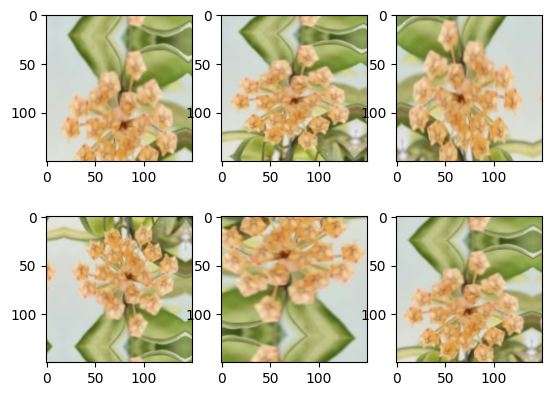

In [ ]:
root = '/content/drive/MyDrive/HOYA/BUNGA/DATA/'
os.path.isdir(root)
list_dir = os.listdir(root) # your directory path
list_dir[1]
for dir in list_dir : #ada
  list_file = os.listdir(root + dir + '/') # your directory path
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    img = image.load_img(url, target_size=(image_size, image_size))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 1
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(2,3,i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 7 == 0:
            break
    break;

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 277 images belonging to 28 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 73 images belonging to 28 classes.


In [ ]:
val_generator.class_indices

{'Affinis': 0,
 'Amicabilis': 1,
 'Australis': 2,
 'Callistophylla': 3,
 'Clemensiorum': 4,
 'Corneri': 5,
 'Dolichosparte': 6,
 'Excavata': 7,
 'Finlaysonii': 8,
 'Forbesii': 9,
 'Garut 1': 10,
 'Gunung Lawu Lumajang': 11,
 'Hypolasia': 12,
 'Incurvula': 13,
 'Latifolia': 14,
 'Multiflora': 15,
 'Polypus': 16,
 'Polypus kalteng': 17,
 'Rigidifolia': 18,
 'Unchinata': 19,
 'aff. parviflora': 20,
 'aff. ranavensis': 21,
 'campanulata white': 22,
 'cf Plicata': 23,
 'cinnamomifolia': 24,
 'occultata silver': 25,
 'scortechinii': 26,
 'sigillatis round leaf': 27}

In [ ]:
#optional
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 62 images belonging to 28 classes.


In [ ]:
base_model121 = densenet.DenseNet169(weights='/content/drive/MyDrive/HOYA/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)


In [ ]:
base_model121

<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
base_model169.output

<KerasTensor: shape=(None, None, None, 1664) dtype=float32 (created by layer 'relu')>

In [ ]:
classes_num = 28 #numberclass we have
validation_steps = 100

In [ ]:
x = base_model121.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x = base_model169.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dropout_23')>

In [ ]:
preds

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_39')>

In [ ]:
model = Model(inputs=base_model121.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

435
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                       

In [ ]:
model = Model(inputs=base_model169.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_generator

TESTING MODEL

In [ ]:
cls_val = val_generator.classes
cls_test = test_generator.classes
val_labels=np.array(cls_val)
test_labels=np.array(cls_test)
print(val_labels)
print(test_labels)

[ 0  0  1  1  1  2  2  2  3  3  3  3  4  4  4  5  5  6  6  6  7  7  8  8
  9  9 10 10 11 11 12 12 13 13 13 13 14 14 15 15 15 16 16 17 17 17 18 18
 18 19 19 20 20 21 21 22 22 22 22 22 22 23 23 24 24 25 25 26 26 26 26 27
 27]
[ 0  0  0  1  1  1  2  2  2  3  3  4  4  5  5  6  6  7  7  8  8  8  9  9
 10 10 11 11 12 12 13 13 13 14 14 15 15 15 16 17 17 18 18 18 19 20 20 20
 21 22 22 22 22 23 24 24 25 25 26 26 27 27]


MODEL IDENTIFICATION

In [ ]:
# menyimpan model terbaik sebagai model baru
filepath = "/content/drive/MyDrive/HOYA/PretrainBunga.densenet.hdf5"

metric = 'val_accuracy'
checkpoint = ModelCheckpoint(filepath, monitor=metric, verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

step_size_train = 100

history=model.fit(train_generator, epochs=100, validation_data=val_generator)
#history = model.fit(train_generator, ytrain, epochs=100,validation_data = (test_generator, yval))

print(history.history.keys())

with open('/content/drive/MyDrive/HOYA/prosesbunga.json', 'w') as f:
    json.dump(history.history, f)


#save model akhir

model.save('/content/drive/MyDrive/HOYA/arsitektur_bunga_densenet121.h5')

model.save_weights('/content/drive/MyDrive/HOYA/new_weights_bunga_densenet121.h5')

Epoch 1/100
9/9 [==============================] - 58s 5s/step - loss: 31.1543 - accuracy: 0.0469 - val_loss: 28.4586 - val_accuracy: 0.0685
Epoch 2/100
9/9 [==============================] - 34s 4s/step - loss: 26.6041 - accuracy: 0.0397 - val_loss: 24.0082 - val_accuracy: 0.0959
Epoch 3/100
9/9 [==============================] - 34s 4s/step - loss: 22.2749 - accuracy: 0.0542 - val_loss: 20.0804 - val_accuracy: 0.1096
Epoch 4/100
9/9 [==============================] - 34s 4s/step - loss: 18.6416 - accuracy: 0.0866 - val_loss: 16.6244 - val_accuracy: 0.1507
Epoch 5/100
9/9 [==============================] - 34s 4s/step - loss: 15.4151 - accuracy: 0.1155 - val_loss: 13.7861 - val_accuracy: 0.1370
Epoch 6/100
9/9 [==============================] - 40s 5s/step - loss: 12.7828 - accuracy: 0.1480 - val_loss: 11.5271 - val_accuracy: 0.1644
Epoch 7/100
9/9 [==============================] - 34s 4s/step - loss: 10.6864 - accuracy: 0.1191 - val_loss: 9.6651 - val_accuracy: 0.1507
Epoch 8/100
9/

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/arsitektur_bunga_densenet121.h5')
#model.save('/content/drive/MyDrive/PENGENALAN POLA/arsiktektur_densenet121.h5')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

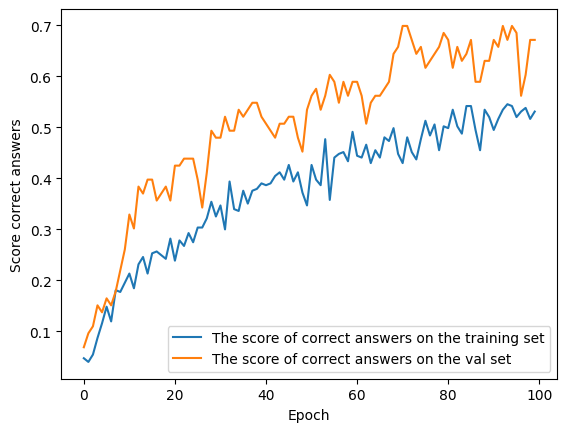

In [ ]:
plt.plot(history.history['accuracy'], label='The score of correct answers on the training set')
plt.plot(history.history['val_accuracy'], label='The score of correct answers on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score correct answers')
plt.legend()
plt.show()

Predict

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/BUNGA/train/test'
dir_class = os.listdir(img_path)
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    print(url_img)
    img = image.load_img(url_img, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.show()
    break;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
class_names=val_generator.class_indices
print(class_names)

{'Amicabilis': 0, 'Anulata': 1, 'Australis': 2, 'Callistophylla': 3, 'Dolichosparte': 4, 'Garut 1': 5, 'Gunung Lawu Lumajang': 6, 'Hypolasia': 7, 'Incurvula': 8, 'Mamasa': 9, 'Minahassae': 10, 'Monetteae': 11, 'Obovata': 12, 'Polypus': 13, 'Polypus kalteng': 14, 'Rigidifolia': 15, 'Surisana': 16, 'Towutiensis': 17, 'Unchinata': 18, 'Vitellina': 19, 'Vittelinoides': 20, 'Walicii ssp Tenebrosa': 21, 'campanulata white': 22, 'caudata': 23, 'occultata silver': 24, 'waymaniae': 25}


In [ ]:
akurasi = 0
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    img = image.load_img(url_img, target_size=(image_size, image_size))
    img_array = image.img_to_array(img)
    img_array /= 255
    img_test= np.expand_dims(img_array, axis=0)
    result = model.predict(img_test)
    hasil=np.argmax(result,axis=1)

    cls = dir_class[int(hasil)]

    print ([f+ ' prediksi ' + cls])
    if f == cls:
      akurasi +=1
print('Akurasi = ', akurasi/90)

1/1 [==============================] - 0s 179ms/step
['Amicabilis prediksi occultata silver']
1/1 [==============================] - 0s 198ms/step
['Amicabilis prediksi campanulata white']
1/1 [==============================] - 0s 319ms/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 369ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 165ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 170ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 181ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 188ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 178ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 197ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 176ms/step
['Callistophylla prediksi Callistophylla']
1/1 [============

In [ ]:
prediction = new_model.predict(test_generator)

3/3 [==============================] - 7s 2s/step


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/arsitektur_bunga_densenet121.h5')
#model.save('/content/drive/MyDrive/PENGENALAN POLA/arsiktektur_densenet121.h5')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

In [ ]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
STEP_SIZE_TEST = test_generator.batch_size
score = new_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)
print ("%s: %.2f%%" % (new_model.metrics_names[1], score[1]*100))

<ipython-input-14-d1aa13eb4e96>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = new_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)


accuracy: 58.06%


In [ ]:
nmodel = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/arsitektur_bunga_densenet121.h5')


In [ ]:
nmodel= nmodel.load_weights('/content/drive/MyDrive/HOYA/new_weights_bunga_densenet121.h5') #tidak tersimpan ternyata


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support


In [ ]:
akurasi = 0
y_pred = np.array([])
img_path = '/content/drive/MyDrive/HOYA/BUNGA/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    img = image.load_img(url_img, target_size=(image_size, image_size))
    img_array = image.img_to_array(img)
    img_array /= 255
    img_test= np.expand_dims(img_array, axis=0)
    result = new_model.predict(img_test)
    hasil=np.argmax(result,axis=1)
    y_pred = np.append(y_pred, int(hasil))
    cls = dir_class[int(hasil)]

    print ([f+ ' prediksi ' + cls])
    if f == cls:
      akurasi +=1
print('Akurasi = ', akurasi/62)

1/1 [==============================] - 0s 141ms/step
['Affinis prediksi Affinis']
1/1 [==============================] - 0s 150ms/step
['Affinis prediksi Affinis']
1/1 [==============================] - 0s 183ms/step
['Affinis prediksi Affinis']
1/1 [==============================] - 0s 183ms/step
['Amicabilis prediksi occultata silver']
1/1 [==============================] - 0s 341ms/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 112ms/step
['Amicabilis prediksi campanulata white']
1/1 [==============================] - 0s 101ms/step
['Australis prediksi Clemensiorum']
1/1 [==============================] - 0s 108ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 106ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 108ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 108ms/step
['Callistophylla prediksi Callistophylla']
1/1 [===================

In [ ]:
y_test = test_generator.classes

print(confusion_matrix(y_test, y_pred))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
img_path = '/content/drive/MyDrive/HOYA/BUNGA/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
test_label=np.array([])
for f in dir_class:
  test_label = np.append(test_label, f)

test_label

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Affinis', 'Amicabilis', 'Australis', 'Callistophylla',
       'Clemensiorum', 'Corneri', 'Dolichosparte', 'Excavata',
       'Finlaysonii', 'Forbesii', 'Garut 1', 'Gunung Lawu Lumajang',
       'Hypolasia', 'Incurvula', 'Latifolia', 'Multiflora', 'Polypus',
       'Polypus kalteng', 'Rigidifolia', 'Unchinata', 'aff. parviflora',
       'aff. ranavensis', 'campanulata white', 'cf Plicata',
       'cinnamomifolia', 'occultata silver', 'scortechinii',
       'sigillatis round leaf'], dtype='<U32')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


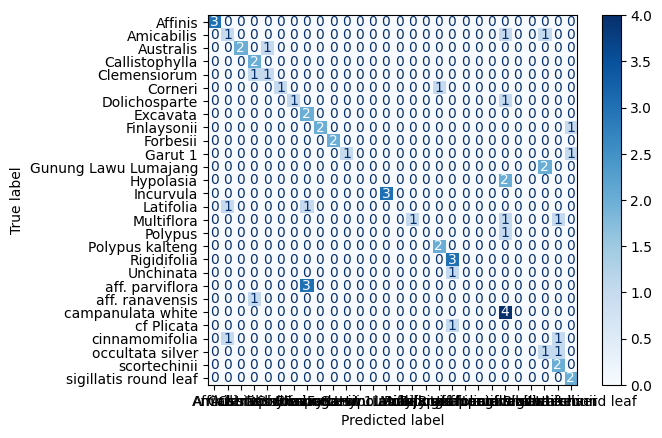

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np




cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_label)

disp.plot(cmap=plt.cm.Blues)
plt.show()

As mentioned in the comments, some labels in y_test don't appear in y_pred. Specifically in this case, label '2' is never predicted:

set(y_test) - set(y_pred)

{2}

This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0. Since you requested an average of the score, you must take into account that a score of 0 was included in the calculation, and this is why scikit-learn is showing you that warning.

In [ ]:
set(y_test) - set(y_pred)


{11, 12, 14, 16, 19, 20, 21, 23, 24}

In [ ]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6789766970618034

In [ ]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       0.33      0.33      0.33         3
         2.0       1.00      0.67      0.80         3
         3.0       0.50      1.00      0.67         2
         4.0       0.50      0.50      0.50         2
         5.0       1.00      0.50      0.67         2
         6.0       1.00      0.50      0.67         2
         7.0       0.33      1.00      0.50         2
         8.0       1.00      0.67      0.80         3
         9.0       1.00      1.00      1.00         2
        10.0       1.00      0.50      0.67         2
        13.0       1.00      1.00      1.00         3
        15.0       1.00      0.33      0.50         3
        17.0       0.67      1.00      0.80         2
        18.0       0.60      1.00      0.75         3
        22.0       0.40      1.00      0.57         4
        25.0       0.25      0.50      0.33         2
        26.0       0.40    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
